## 0. Connect Google Drive

In [1]:
import os
from google.colab import drive
drive.mount('/gdrive')

!ls /gdrive

Mounted at /gdrive
MyDrive


## 1. Download the Dataset
Here we will use the `LaboroTomato` Dataset from the [laboro.ai](laboro.ai). For more details checkout their [github](https://github.com/laboroai/LaboroTomato?tab=readme-ov-file).**bold text**
```
name: tomato_mixed
images: 643 train, 161 test
cls_num: 6
cls_names: b_fully_ripened, b_half_ripened, b_green, l_fully_ripened, l_half_ripened, l_green
total_bboxes: train[7781], test[1,996]
bboxes_per_class:
    *Train: b_fully_ripened[348], b_half_ripened[520], b_green[1467],
            l_fully_ripened[982], l_half_ripened[797], l_green[3667]
    *Test:  b_fully_ripened[72], b_half_ripened[116], b_green[387],
            l_fully_ripened[269], l_half_ripened[223], l_green[929]
image_resolutions: 3024x4032, 3120x4160
```

In [2]:
# # Download & extract dataset in Colab

# # If dataset is from URL
# !wget -q -O laboro_tomato.zip "http://assets.laboro.ai.s3.amazonaws.com/laborotomato/laboro_tomato.zip"
# !unzip -q laboro_tomato.zip -d laboro_tomato
# !rm laboro_tomato.zip

# print("Dataset extracted to ./laboro_tomato")
# # If from Google Drive
# # from google.colab import drive; drive.mount('/content/drive')
# # !unzip -q "/content/drive/MyDrive/path_to_dataset.zip" -d {dataset_dir}

# print(f"Dataset ready at laboro_tomato")


## 2. Create a new directory in your google drive

In [3]:
# # Create new directory for reformatted dataset
# output_dir = '/gdrive/MyDrive/Datasets/laboro_tomato_yolov8-seg-format'
# os.makedirs(output_dir, exist_ok=True)

# print(f"Created directory: {output_dir}")

## 3. Reformat as according to YOLOv8-seg

In [4]:
# import json
# import shutil
# from pathlib import Path

# def coco_to_yolo_seg(coco_json_path, images_dir, output_images_dir, output_labels_dir):
#     """
#     Convert COCO-format instance segmentation to YOLOv8-seg format and copy images.
#     """
#     # Load COCO JSON
#     with open(coco_json_path, 'r') as f:
#         coco_data = json.load(f)

#     # Build ID → filename lookup
#     image_lookup = {img["id"]: img for img in coco_data["images"]}

#     # Create output dirs
#     os.makedirs(output_images_dir, exist_ok=True)
#     os.makedirs(output_labels_dir, exist_ok=True)

#     # Group annotations by image
#     annotations_by_image = {}
#     for ann in coco_data["annotations"]:
#         img_id = ann["image_id"]
#         annotations_by_image.setdefault(img_id, []).append(ann)

#     for img_id, anns in annotations_by_image.items():
#         img_info = image_lookup[img_id]
#         src_img_path = Path(images_dir) / img_info["file_name"]

#         if not src_img_path.exists():
#             print(f"Warning: Image not found: {src_img_path}")
#             continue

#         # Copy image to YOLO dataset folder
#         dst_img_path = Path(output_images_dir) / src_img_path.name
#         shutil.copy2(src_img_path, dst_img_path)

#         width = img_info["width"]
#         height = img_info["height"]

#         # Create label file path
#         label_filename = Path(img_info["file_name"]).with_suffix(".txt")
#         label_path = Path(output_labels_dir) / label_filename

#         with open(label_path, 'w') as lf:
#             for ann in anns:
#                 class_id = ann["category_id"] - 1  # YOLO classes start at 0

#                 for seg in ann["segmentation"]:
#                     norm_coords = []
#                     for i in range(0, len(seg), 2):
#                         x = seg[i] / width
#                         y = seg[i + 1] / height
#                         norm_coords.extend([x, y])

#                     lf.write(f"{class_id} " + " ".join(f"{v:.6f}" for v in norm_coords) + "\n")

#     return coco_data["categories"]  # Return categories for data.yaml creation


# def create_data_yaml(categories, dataset_path):
#     """
#     Create YOLOv8 data.yaml file.
#     """
#     names = [cat["name"] for cat in categories]
#     yaml_content = f"""train: {dataset_path}/train/images
# val: {dataset_path}/test/images

# nc: {len(names)}
# names: {names}
# """
#     with open(Path(dataset_path) / "data.yaml", "w") as f:
#         f.write(yaml_content)
#     print(f"data.yaml created at {Path(dataset_path) / 'data.yaml'}")


# if __name__ == "__main__":
#     # Original dataset root
#     dataset_root = Path("laboro_tomato/laboro_tomato")

#     # Output YOLOv8 dataset root
#     yolo_dataset_root = Path("/gdrive/MyDrive/Datasets/laboro_tomato_yolov8-seg-format")

#     # Train
#     categories = coco_to_yolo_seg(
#         coco_json_path=dataset_root / "annotations" / "train.json",
#         images_dir=dataset_root / "train",
#         output_images_dir=yolo_dataset_root / "train" / "images",
#         output_labels_dir=yolo_dataset_root / "train" / "labels"
#     )

#     # Test
#     coco_to_yolo_seg(
#         coco_json_path=dataset_root / "annotations" / "test.json",
#         images_dir=dataset_root / "test",
#         output_images_dir=yolo_dataset_root / "test" / "images",
#         output_labels_dir=yolo_dataset_root / "test" / "labels"
#     )

#     # Create data.yaml
#     create_data_yaml(categories, yolo_dataset_root)

#     print(f"YOLOv8 dataset prepared at: {yolo_dataset_root.resolve()}")


## 4. Verify the reformatted dataset

1. Collect Image Paths
2. Pick Random Samples
3. Loop Over Sample Images
4. Load Image
5. Read YOLO Labels
6. Draw Polygons and color them
7. Show Images

### Purpose of This Script

- To visually confirm that your dataset reformatting worked correctly.
- Ensures that polygons from your .txt labels align perfectly with the objects in your images before training.




    Red: b_fully_ripened
    Blue: b_half_ripened
    Green: b_green
    Magenta: l_fully_ripened
    Cyan: l_half_ripened
    Yellow: l_green
    


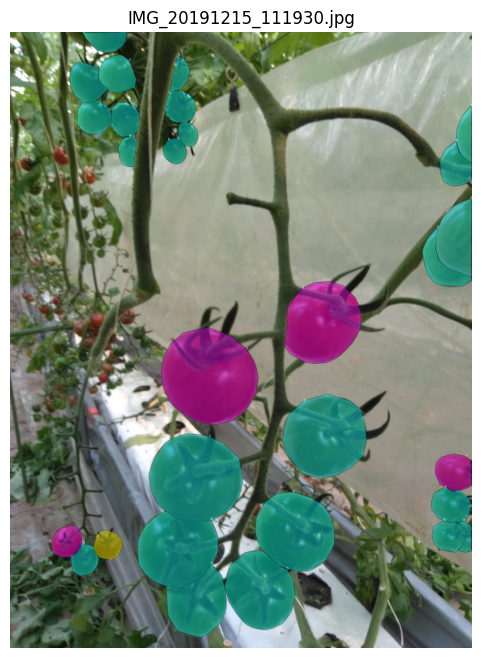

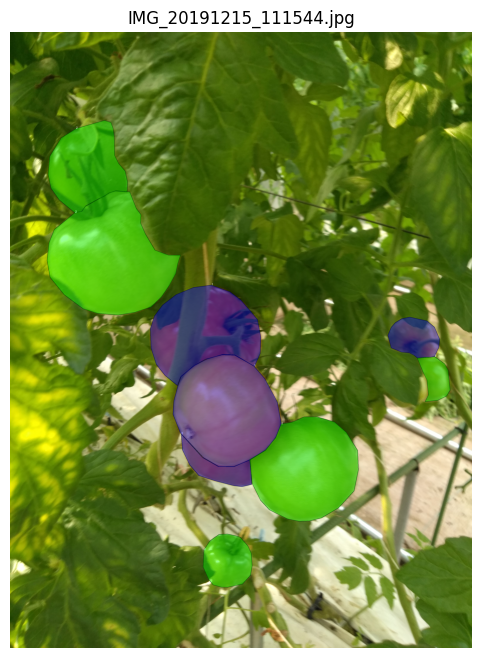

In [14]:
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

def visualize_yolo_seg(images_dir, labels_dir, num_samples=2):
    # Define colors for classes (expand if needed)
    COLORS = [
        (255, 0, 0),    # Class 0 - Red (b_fully_ripened: big tomatoes, fully ripened)
        (0, 0, 255),    # Class 1 - Blue (b_half_ripened: big tomatoes, half ripened)
        (0, 255, 0),    # Class 2 - Green (b_green: big tomatoes, not ripe)
        (255, 0, 255),  # Class 3 - Magenta (l_fully_ripened: cherry tomatoes, fully ripened)
        (255, 255, 0),  # Class 4 - Cyan (l_half_ripened: cherry tomatoes, half ripened)
        (0, 255, 255),  # Class 5 - Yellow (l_green: cherry tomatoes, not ripe)
    ]
    print('''
    Red: b_fully_ripened
    Blue: b_half_ripened
    Green: b_green
    Magenta: l_fully_ripened
    Cyan: l_half_ripened
    Yellow: l_green
    ''')
    image_paths = list(Path(images_dir).glob("*.jpg")) + list(Path(images_dir).glob("*.png"))
    if not image_paths:
        print("No images found in:", images_dir)
        return

    samples = random.sample(image_paths, min(num_samples, len(image_paths)))

    for img_path in samples:
        label_path = Path(labels_dir) / (img_path.stem + ".txt")

        if not label_path.exists():
            print(f"No label file for {img_path.name}, skipping.")
            continue

        img = cv2.imread(str(img_path))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        overlay = img.copy()
        h, w, _ = img.shape

        with open(label_path, 'r') as f:
            lines = f.readlines()

        for line in lines:
            parts = line.strip().split()
            cls_id = int(parts[0])
            coords = list(map(float, parts[1:]))

            polygon = [(int(coords[i] * w), int(coords[i+1] * h)) for i in range(0, len(coords), 2)]
            pts = np.array(polygon, np.int32).reshape((-1, 1, 2))

            # Get color for this class
            color = COLORS[cls_id % len(COLORS)]

            # Fill polygon
            cv2.fillPoly(overlay, [pts], color)

            # Draw outline
            cv2.polylines(img, [pts], isClosed=True, color=(0, 0, 0), thickness=2)

            # Add class label
            cv2.putText(img, str(cls_id), polygon[0], cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)

        # Blend filled overlay with original image for transparency
        img = cv2.addWeighted(overlay, 0.4, img, 0.6, 0)

        plt.figure(figsize=(8, 8))
        plt.imshow(img)
        plt.axis("off")
        plt.title(img_path.name)
        plt.show()

# Example usage
visualize_yolo_seg(
    images_dir="/gdrive/MyDrive/Datasets/laboro_tomato_yolov8-seg-format/train/images",
    labels_dir="/gdrive/MyDrive/Datasets/laboro_tomato_yolov8-seg-format/train/labels",
    num_samples=2
)


## 5. Install and set up YOLOv8 in Colab

*   Import YOLOv8 in your Colab notebook and verify version.
*   Ensure GPU runtime is enabled in Colab.

In [15]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 125.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 66.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 67.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 102.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu1

## 6. Train YOLOv8-seg model
- Use your generated data.yaml.
- Start with a pre-trained segmentation model (e.g., yolov8n-seg.pt or yolov8s-seg.pt).
- Monitor mAP, precision, recall during training.

In [17]:
from ultralytics import YOLO
model = YOLO("yolov8n-seg.pt")
model.train(data="/gdrive/MyDrive/Datasets/laboro_tomato_yolov8-seg-format/data.yaml", epochs=100, imgsz=640)


Ultralytics 8.3.179 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/gdrive/MyDrive/Datasets/laboro_tomato_yolov8-seg-format/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspe

Overriding model.yaml nc=80 with nc=6

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

YOLOv8n-seg summary: 151 layers, 3,264,786 parameters, 3,264,770 gradients, 12.1 GFLOPs

Transferred 381/417 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.4±0.1 ms, read: 2.9±1.9 MB/s, size: 1457.1 KB)


train: Scanning /gdrive/MyDrive/Datasets/laboro_tomato_yolov8-seg-format/train/labels... 643 images, 0 backgrounds, 0 corrupt: 100%|██████████| 643/643 [04:42<00:00,  2.28it/s]


train: New cache created: /gdrive/MyDrive/Datasets/laboro_tomato_yolov8-seg-format/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 3.2±5.6 ms, read: 117.2±158.6 MB/s, size: 1312.5 KB)


val: Scanning /gdrive/MyDrive/Datasets/laboro_tomato_yolov8-seg-format/test/labels... 161 images, 0 backgrounds, 0 corrupt: 100%|██████████| 161/161 [00:58<00:00,  2.73it/s]

val: New cache created: /gdrive/MyDrive/Datasets/laboro_tomato_yolov8-seg-format/test/labels.cache


Plotting labels to runs/segment/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/segment/train2
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/100      3.52G      1.136      2.163      3.218       1.09         55        640: 100%|██████████| 41/41 [01:31<00:00,  2.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:11<00:00,  1.84s/it]


                   all        161       1996       0.34      0.161      0.137     0.0942       0.34      0.161      0.137     0.0979

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/100      4.68G      1.011      1.631       1.86      1.003         58        640: 100%|██████████| 41/41 [01:11<00:00,  1.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:11<00:00,  1.92s/it]


                   all        161       1996      0.439      0.374      0.323      0.238      0.439      0.374      0.321      0.226

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/100       4.7G     0.9593      1.536      1.462     0.9747        124        640: 100%|██████████| 41/41 [01:10<00:00,  1.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:09<00:00,  1.62s/it]


                   all        161       1996      0.481       0.57      0.501      0.367      0.478      0.562      0.496      0.355

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/100      4.71G     0.9004      1.474      1.343     0.9606         55        640: 100%|██████████| 41/41 [01:14<00:00,  1.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:07<00:00,  1.28s/it]


                   all        161       1996      0.517      0.528      0.502      0.385      0.516      0.524      0.498       0.37

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/100      4.74G     0.8723      1.413      1.232     0.9601         42        640: 100%|██████████| 41/41 [01:07<00:00,  1.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:09<00:00,  1.57s/it]

                   all        161       1996      0.576      0.593      0.559      0.438      0.572      0.588      0.551      0.426



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/100      4.76G     0.8431      1.362      1.148     0.9476         77        640: 100%|██████████| 41/41 [01:12<00:00,  1.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:09<00:00,  1.56s/it]


                   all        161       1996      0.683      0.646      0.682      0.537      0.678      0.648      0.679      0.524

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/100      4.77G     0.8405      1.343      1.128     0.9538         49        640: 100%|██████████| 41/41 [01:09<00:00,  1.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:07<00:00,  1.26s/it]


                   all        161       1996      0.613       0.65      0.639      0.503      0.612      0.645      0.635      0.479

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/100      4.78G     0.8278      1.295      1.068     0.9354         41        640: 100%|██████████| 41/41 [01:11<00:00,  1.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:09<00:00,  1.61s/it]


                   all        161       1996      0.615      0.613      0.624      0.494      0.607      0.616      0.617      0.472

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/100      4.81G     0.8062      1.267      1.059     0.9325         66        640: 100%|██████████| 41/41 [01:12<00:00,  1.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:08<00:00,  1.46s/it]


                   all        161       1996      0.717      0.668      0.722      0.565      0.704      0.673      0.712      0.534

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/100      4.83G      0.785      1.248      1.009     0.9304         49        640: 100%|██████████| 41/41 [01:09<00:00,  1.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:07<00:00,  1.27s/it]


                   all        161       1996      0.687      0.685      0.727      0.588      0.685      0.683      0.719      0.558

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/100      4.85G     0.7895      1.237     0.9727     0.9264         55        640: 100%|██████████| 41/41 [01:10<00:00,  1.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:09<00:00,  1.52s/it]


                   all        161       1996      0.756      0.699      0.761      0.609      0.753      0.694      0.754      0.579

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/100      4.86G     0.7849      1.225      0.962     0.9248         36        640: 100%|██████████| 41/41 [01:08<00:00,  1.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:07<00:00,  1.21s/it]

                   all        161       1996      0.723      0.705      0.753      0.614      0.723        0.7      0.749      0.584



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/100      4.88G     0.7629      1.212      0.955      0.923         52        640: 100%|██████████| 41/41 [01:08<00:00,  1.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:09<00:00,  1.58s/it]


                   all        161       1996      0.708      0.672      0.715       0.57      0.709      0.672      0.709      0.543

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/100       4.9G     0.7833      1.206     0.9753     0.9239         23        640: 100%|██████████| 41/41 [01:08<00:00,  1.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:09<00:00,  1.66s/it]


                   all        161       1996      0.655      0.756      0.754      0.599      0.653       0.75      0.749      0.569

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/100      4.92G     0.7595      1.177     0.9033     0.9172         30        640: 100%|██████████| 41/41 [01:08<00:00,  1.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:11<00:00,  1.92s/it]


                   all        161       1996      0.745      0.721      0.765      0.616      0.745      0.719      0.759      0.583

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/100      4.93G     0.7489      1.155     0.8926     0.9166         56        640: 100%|██████████| 41/41 [01:09<00:00,  1.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:08<00:00,  1.47s/it]


                   all        161       1996      0.609      0.664      0.648      0.516      0.607      0.662      0.643      0.495

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/100      4.96G     0.7492      1.177     0.8872     0.9135        127        640: 100%|██████████| 41/41 [01:11<00:00,  1.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:07<00:00,  1.20s/it]


                   all        161       1996        0.7      0.693      0.744      0.594        0.7      0.693      0.743      0.572

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/100      4.98G     0.7612      1.164      0.867     0.9162         53        640: 100%|██████████| 41/41 [01:07<00:00,  1.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:09<00:00,  1.60s/it]


                   all        161       1996      0.735      0.698      0.749        0.6      0.736        0.7      0.746       0.57

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/100         5G       0.74      1.149     0.8826     0.9173         31        640: 100%|██████████| 41/41 [01:06<00:00,  1.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:08<00:00,  1.35s/it]


                   all        161       1996      0.655      0.753      0.751      0.607      0.655      0.756       0.75      0.584

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/100         5G     0.7601        1.2      0.848     0.9129        102        640: 100%|██████████| 41/41 [01:14<00:00,  1.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:07<00:00,  1.23s/it]


                   all        161       1996      0.685      0.726      0.757      0.611      0.683      0.722      0.753      0.582

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/100      5.03G      0.735      1.131     0.8098     0.9119         56        640: 100%|██████████| 41/41 [01:09<00:00,  1.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:08<00:00,  1.45s/it]


                   all        161       1996      0.802      0.699      0.794      0.647        0.8      0.699      0.788      0.613

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/100      5.05G     0.7295      1.114     0.8265     0.9067         41        640: 100%|██████████| 41/41 [01:10<00:00,  1.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:11<00:00,  1.90s/it]

                   all        161       1996      0.744      0.715      0.781      0.636      0.741      0.711      0.773      0.604



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/100      5.07G     0.7138      1.097     0.8216     0.9055         43        640: 100%|██████████| 41/41 [01:10<00:00,  1.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:09<00:00,  1.65s/it]


                   all        161       1996      0.743      0.713      0.773      0.631      0.741      0.713       0.77        0.6

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/100      5.08G     0.7269      1.113     0.7971     0.9033         90        640: 100%|██████████| 41/41 [01:08<00:00,  1.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:09<00:00,  1.61s/it]

                   all        161       1996      0.743      0.723      0.775      0.631      0.743      0.722       0.77      0.597



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/100      5.11G      0.735      1.133     0.8005     0.9103         70        640: 100%|██████████| 41/41 [01:07<00:00,  1.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:07<00:00,  1.33s/it]


                   all        161       1996      0.749      0.732      0.796      0.649      0.748      0.731      0.791       0.62

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/100      5.13G     0.7281      1.125       0.79     0.9051        111        640: 100%|██████████| 41/41 [01:05<00:00,  1.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:09<00:00,  1.54s/it]


                   all        161       1996      0.747      0.747      0.806      0.655      0.786      0.717      0.798      0.613

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/100      5.14G     0.6952      1.064     0.7455      0.892         43        640: 100%|██████████| 41/41 [01:11<00:00,  1.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:08<00:00,  1.35s/it]


                   all        161       1996      0.753      0.727      0.792      0.648      0.743      0.728      0.787      0.614

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/100      5.15G     0.7102      1.095     0.7403      0.898        104        640: 100%|██████████| 41/41 [01:06<00:00,  1.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:08<00:00,  1.41s/it]


                   all        161       1996      0.785      0.701      0.794      0.656      0.787        0.7      0.789      0.616

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/100      5.18G     0.6985      1.067     0.7384     0.8973         67        640: 100%|██████████| 41/41 [01:06<00:00,  1.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:07<00:00,  1.26s/it]


                   all        161       1996      0.721       0.75      0.791      0.647      0.722      0.744      0.784      0.622

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/100       5.2G     0.7053      1.062     0.7678     0.9019        102        640: 100%|██████████| 41/41 [01:07<00:00,  1.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:08<00:00,  1.39s/it]


                   all        161       1996      0.732      0.743      0.794       0.65       0.73      0.739      0.786      0.611

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/100      5.22G     0.7007      1.081     0.7588     0.8983         63        640: 100%|██████████| 41/41 [01:05<00:00,  1.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:08<00:00,  1.36s/it]


                   all        161       1996      0.752       0.71      0.777      0.638      0.749      0.704      0.771      0.608

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/100      5.23G     0.6963      1.075     0.7468      0.895         67        640: 100%|██████████| 41/41 [01:09<00:00,  1.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:07<00:00,  1.19s/it]


                   all        161       1996      0.727      0.745      0.792      0.648      0.727      0.745      0.788      0.612

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/100      5.26G     0.6941      1.061     0.7473     0.8964         84        640: 100%|██████████| 41/41 [01:05<00:00,  1.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:10<00:00,  1.70s/it]


                   all        161       1996      0.756      0.727      0.796      0.653      0.754      0.722      0.785       0.62

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/100      5.28G      0.674       1.03     0.7068     0.8924         27        640: 100%|██████████| 41/41 [01:11<00:00,  1.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:09<00:00,  1.56s/it]


                   all        161       1996      0.689       0.72      0.732      0.597      0.689       0.72      0.727      0.561

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/100      5.29G     0.6924      1.063      0.707     0.8883         40        640: 100%|██████████| 41/41 [01:07<00:00,  1.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:09<00:00,  1.53s/it]


                   all        161       1996      0.715      0.757      0.792      0.649      0.716      0.754      0.785      0.615

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/100       5.3G     0.6722      1.009      0.704      0.893         47        640: 100%|██████████| 41/41 [01:08<00:00,  1.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:09<00:00,  1.61s/it]

                   all        161       1996      0.692      0.723      0.764      0.636      0.694      0.723      0.759      0.599



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/100      5.33G      0.697       1.06     0.7035     0.8909         32        640: 100%|██████████| 41/41 [01:06<00:00,  1.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:09<00:00,  1.55s/it]

                   all        161       1996      0.764      0.756      0.807      0.669      0.764      0.755      0.801      0.629



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/100      5.35G     0.6741      1.003     0.6656     0.8878         36        640: 100%|██████████| 41/41 [01:07<00:00,  1.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:08<00:00,  1.37s/it]


                   all        161       1996      0.763      0.757      0.811       0.67      0.761      0.755      0.807      0.635

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/100      5.37G     0.6767      1.018      0.685     0.8876         38        640: 100%|██████████| 41/41 [01:06<00:00,  1.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:10<00:00,  1.70s/it]


                   all        161       1996      0.776      0.749      0.821      0.678      0.777      0.745      0.815       0.64

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/100      5.37G      0.687       1.06     0.6794     0.8903        100        640: 100%|██████████| 41/41 [01:07<00:00,  1.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:08<00:00,  1.38s/it]


                   all        161       1996      0.773      0.734      0.805      0.665      0.771      0.726      0.796      0.627

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/100      5.41G     0.6784      1.027     0.6766     0.8904         17        640: 100%|██████████| 41/41 [01:08<00:00,  1.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:10<00:00,  1.74s/it]


                   all        161       1996      0.751      0.772      0.821      0.675      0.787      0.726      0.811      0.641

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/100      5.42G      0.672      1.013     0.6838     0.8887         51        640: 100%|██████████| 41/41 [01:08<00:00,  1.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:08<00:00,  1.44s/it]


                   all        161       1996      0.795      0.716      0.809      0.671      0.794      0.716      0.802      0.637

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/100      5.44G     0.6694      1.017     0.6596     0.8893         99        640: 100%|██████████| 41/41 [01:06<00:00,  1.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:09<00:00,  1.54s/it]

                   all        161       1996       0.72      0.727       0.78      0.649      0.719      0.725      0.773      0.611



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/100      5.45G      0.667      1.007     0.6501     0.8834         57        640: 100%|██████████| 41/41 [01:08<00:00,  1.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:08<00:00,  1.37s/it]


                   all        161       1996      0.722      0.748      0.793      0.657      0.719      0.741      0.784      0.616

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/100      5.48G     0.6715     0.9944     0.6693     0.8854         61        640: 100%|██████████| 41/41 [01:06<00:00,  1.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:09<00:00,  1.52s/it]


                   all        161       1996      0.757      0.708      0.794      0.652      0.755      0.704      0.788      0.612

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/100       5.5G     0.6633     0.9969     0.6575     0.8831         48        640: 100%|██████████| 41/41 [01:09<00:00,  1.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:07<00:00,  1.29s/it]

                   all        161       1996      0.757      0.771      0.817      0.677      0.756      0.771       0.81      0.634



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/100      5.52G     0.6552     0.9992     0.6443      0.886         22        640: 100%|██████████| 41/41 [01:07<00:00,  1.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:09<00:00,  1.51s/it]


                   all        161       1996      0.769      0.739      0.811      0.672      0.769      0.737      0.803      0.635

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/100      5.52G     0.6729      1.005     0.6398     0.8843         47        640: 100%|██████████| 41/41 [01:06<00:00,  1.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:08<00:00,  1.43s/it]

                   all        161       1996      0.786      0.713      0.817      0.676       0.78      0.719      0.811      0.641



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/100      5.55G     0.6588     0.9854      0.632     0.8829         27        640: 100%|██████████| 41/41 [01:06<00:00,  1.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:07<00:00,  1.32s/it]


                   all        161       1996      0.766      0.767      0.815      0.683      0.767      0.764      0.809      0.638

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/100      5.57G     0.6534     0.9801     0.6274     0.8815         32        640: 100%|██████████| 41/41 [01:07<00:00,  1.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:09<00:00,  1.61s/it]

                   all        161       1996      0.775      0.739      0.801      0.663      0.775      0.727      0.793      0.623



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/100      5.59G     0.6339     0.9489     0.6192     0.8799         75        640: 100%|██████████| 41/41 [01:06<00:00,  1.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:07<00:00,  1.30s/it]

                   all        161       1996       0.76      0.761      0.815      0.684       0.76      0.758      0.809      0.642



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/100       5.6G     0.6602     0.9999     0.6376     0.8819         58        640: 100%|██████████| 41/41 [01:08<00:00,  1.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:10<00:00,  1.77s/it]

                   all        161       1996      0.794      0.733      0.825       0.69      0.792      0.733      0.819      0.651



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/100      5.62G     0.6478     0.9748     0.6117     0.8789         45        640: 100%|██████████| 41/41 [01:11<00:00,  1.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:09<00:00,  1.62s/it]


                   all        161       1996       0.79      0.747      0.832      0.696      0.789      0.744      0.824      0.655

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/100      5.64G     0.6447     0.9639     0.6301     0.8761         79        640: 100%|██████████| 41/41 [01:04<00:00,  1.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:10<00:00,  1.76s/it]

                   all        161       1996      0.749      0.754      0.812      0.676      0.745      0.749      0.804      0.633



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/100      5.66G     0.6538     0.9664     0.6095     0.8775         62        640: 100%|██████████| 41/41 [01:08<00:00,  1.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:09<00:00,  1.63s/it]


                   all        161       1996      0.739      0.773       0.82      0.684      0.734      0.771      0.813      0.647

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/100      5.67G     0.6427     0.9509     0.5967     0.8766         68        640: 100%|██████████| 41/41 [01:04<00:00,  1.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:10<00:00,  1.80s/it]

                   all        161       1996      0.796      0.729      0.822      0.686      0.781      0.738      0.814       0.64



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/100       5.7G      0.643      0.972      0.595     0.8742         57        640: 100%|██████████| 41/41 [01:07<00:00,  1.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:15<00:00,  2.52s/it]

                   all        161       1996      0.825      0.689      0.811      0.678        0.8      0.704      0.806      0.637



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/100      5.72G     0.6414     0.9512     0.5991     0.8732         99        640: 100%|██████████| 41/41 [01:07<00:00,  1.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:07<00:00,  1.30s/it]

                   all        161       1996      0.776      0.768       0.82       0.69      0.787      0.763      0.817      0.651



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/100      5.74G     0.6278     0.9356     0.5907     0.8722         46        640: 100%|██████████| 41/41 [01:05<00:00,  1.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:09<00:00,  1.62s/it]

                   all        161       1996      0.787      0.788      0.831        0.7      0.793      0.789      0.829      0.659



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/100      5.74G     0.6537     0.9843     0.5972     0.8757         82        640: 100%|██████████| 41/41 [01:07<00:00,  1.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:08<00:00,  1.48s/it]

                   all        161       1996      0.797      0.746      0.824      0.686      0.799      0.745      0.818      0.643



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/100      5.78G     0.6225     0.9343     0.5647      0.872         30        640: 100%|██████████| 41/41 [01:07<00:00,  1.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:09<00:00,  1.64s/it]

                   all        161       1996      0.777      0.754      0.822      0.689      0.777      0.754      0.816      0.651



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/100      5.79G     0.6283     0.9476      0.583     0.8693         86        640: 100%|██████████| 41/41 [01:05<00:00,  1.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:10<00:00,  1.76s/it]

                   all        161       1996      0.765       0.76      0.814       0.68      0.769      0.756      0.808      0.638



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/100      5.81G     0.6285      0.925     0.5673     0.8724         45        640: 100%|██████████| 41/41 [01:09<00:00,  1.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:09<00:00,  1.56s/it]


                   all        161       1996      0.792      0.729      0.808      0.676      0.788      0.726      0.799      0.633

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/100      5.82G     0.6317     0.9495     0.5809     0.8741         39        640: 100%|██████████| 41/41 [01:06<00:00,  1.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:10<00:00,  1.75s/it]

                   all        161       1996      0.807      0.757      0.838      0.698      0.807       0.76      0.834      0.659



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/100      5.85G     0.6147     0.9127     0.5518     0.8663         58        640: 100%|██████████| 41/41 [01:06<00:00,  1.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:10<00:00,  1.74s/it]

                   all        161       1996      0.798      0.754      0.842      0.705      0.797      0.754      0.835      0.667



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/100      5.87G     0.6171     0.9196     0.5582     0.8704         54        640: 100%|██████████| 41/41 [01:06<00:00,  1.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:09<00:00,  1.52s/it]


                   all        161       1996      0.755      0.762      0.819      0.684      0.755      0.761      0.814      0.645

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/100      5.88G     0.6184     0.9188     0.5568     0.8668         85        640: 100%|██████████| 41/41 [01:05<00:00,  1.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:07<00:00,  1.24s/it]


                   all        161       1996      0.786      0.757       0.82      0.685      0.784      0.756      0.815      0.646

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/100      5.89G     0.6127     0.8944     0.5485     0.8662         63        640: 100%|██████████| 41/41 [01:05<00:00,  1.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:08<00:00,  1.48s/it]

                   all        161       1996      0.752      0.733      0.798      0.672      0.754      0.729      0.793      0.628



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/100      5.92G     0.6154     0.9315     0.5693     0.8714         51        640: 100%|██████████| 41/41 [01:04<00:00,  1.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:09<00:00,  1.52s/it]


                   all        161       1996       0.77      0.756      0.816      0.688      0.769      0.755      0.811       0.64

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/100      5.94G     0.6399     0.9622     0.5744     0.8719         41        640: 100%|██████████| 41/41 [01:07<00:00,  1.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:07<00:00,  1.30s/it]


                   all        161       1996      0.768      0.754      0.826      0.693      0.788      0.733      0.819      0.648

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/100      5.96G     0.6152     0.9236     0.5485     0.8644        104        640: 100%|██████████| 41/41 [01:06<00:00,  1.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:08<00:00,  1.42s/it]


                   all        161       1996      0.768       0.77      0.822      0.691      0.769       0.77      0.818       0.65

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/100      5.97G     0.6078      0.908     0.5532     0.8659         11        640: 100%|██████████| 41/41 [01:05<00:00,  1.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:08<00:00,  1.47s/it]


                   all        161       1996       0.76      0.731      0.809      0.683      0.759       0.73      0.804       0.64

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/100         6G     0.6026      0.903     0.5304     0.8648         37        640: 100%|██████████| 41/41 [01:04<00:00,  1.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:08<00:00,  1.46s/it]

                   all        161       1996      0.786      0.746      0.837      0.707      0.786      0.747      0.831      0.667



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     74/100      6.01G     0.5887      0.881     0.5272     0.8627         46        640: 100%|██████████| 41/41 [01:07<00:00,  1.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:10<00:00,  1.70s/it]

                   all        161       1996      0.783       0.75      0.816      0.685      0.784       0.75       0.81      0.643



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     75/100      6.03G     0.6164     0.9072     0.5354      0.867         29        640: 100%|██████████| 41/41 [01:03<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:08<00:00,  1.50s/it]

                   all        161       1996      0.804       0.74      0.824      0.689      0.803      0.737      0.815      0.644



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     76/100      6.04G     0.6145     0.9043     0.5212     0.8652         76        640: 100%|██████████| 41/41 [01:06<00:00,  1.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:07<00:00,  1.28s/it]


                   all        161       1996      0.809      0.736      0.836      0.705      0.795      0.745      0.828      0.659

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     77/100      6.07G     0.6115     0.9237     0.5336     0.8628        108        640: 100%|██████████| 41/41 [01:07<00:00,  1.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:07<00:00,  1.32s/it]

                   all        161       1996      0.796      0.723      0.819      0.691      0.795      0.722      0.813      0.649



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     78/100      6.09G     0.6172      0.919     0.5272     0.8611         89        640: 100%|██████████| 41/41 [01:04<00:00,  1.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:08<00:00,  1.48s/it]


                   all        161       1996      0.774      0.775      0.834      0.702      0.778       0.77      0.829       0.66

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     79/100      6.11G     0.6082     0.9058     0.5302     0.8646         72        640: 100%|██████████| 41/41 [01:06<00:00,  1.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:07<00:00,  1.22s/it]

                   all        161       1996      0.774      0.785      0.829      0.698      0.778      0.787      0.827      0.661



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     80/100      6.11G     0.5933     0.8717     0.5326     0.8611         27        640: 100%|██████████| 41/41 [01:07<00:00,  1.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:07<00:00,  1.26s/it]


                   all        161       1996      0.768      0.761      0.831        0.7      0.735      0.795      0.827      0.658

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     81/100      6.14G      0.599     0.8954     0.5304     0.8619         28        640: 100%|██████████| 41/41 [01:06<00:00,  1.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:09<00:00,  1.58s/it]


                   all        161       1996      0.775      0.773      0.836      0.708      0.771      0.785      0.832      0.665

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     82/100      6.16G     0.6035     0.8982     0.5099      0.858         91        640: 100%|██████████| 41/41 [01:05<00:00,  1.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:08<00:00,  1.33s/it]


                   all        161       1996      0.751      0.781      0.824      0.696      0.755      0.784      0.821      0.654

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     83/100      6.18G     0.5891     0.8856     0.5067      0.861         45        640: 100%|██████████| 41/41 [01:07<00:00,  1.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:09<00:00,  1.50s/it]

                   all        161       1996      0.789      0.747      0.832      0.704      0.789      0.747      0.828      0.662



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     84/100      6.19G     0.5909     0.8919     0.5036     0.8528         96        640: 100%|██████████| 41/41 [01:07<00:00,  1.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:08<00:00,  1.37s/it]

                   all        161       1996      0.781       0.79       0.84      0.709      0.793      0.769      0.835      0.666



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     85/100      6.22G     0.5887     0.8712      0.505     0.8596         21        640: 100%|██████████| 41/41 [01:07<00:00,  1.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:09<00:00,  1.64s/it]


                   all        161       1996      0.768      0.786      0.841      0.714      0.788      0.771      0.839      0.671

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     86/100      6.24G     0.5875     0.8625     0.4996     0.8561         47        640: 100%|██████████| 41/41 [01:04<00:00,  1.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:09<00:00,  1.63s/it]

                   all        161       1996      0.784      0.785      0.844      0.714      0.781      0.784      0.837      0.671



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     87/100      6.26G      0.598     0.9069      0.493     0.8547         46        640: 100%|██████████| 41/41 [01:07<00:00,  1.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:08<00:00,  1.45s/it]


                   all        161       1996      0.806      0.767      0.843      0.713      0.805      0.765      0.836       0.67

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     88/100      6.26G     0.5924     0.8856     0.4981      0.856        106        640: 100%|██████████| 41/41 [01:07<00:00,  1.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:10<00:00,  1.73s/it]

                   all        161       1996      0.796      0.774      0.844      0.714      0.795      0.773      0.837      0.669



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     89/100      6.29G     0.5793     0.8559     0.4804     0.8515         38        640: 100%|██████████| 41/41 [01:07<00:00,  1.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:07<00:00,  1.25s/it]

                   all        161       1996      0.756      0.806      0.847      0.716      0.755      0.804       0.84      0.672



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     90/100      6.31G     0.5938     0.8875     0.4958     0.8568         56        640: 100%|██████████| 41/41 [01:07<00:00,  1.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:10<00:00,  1.78s/it]

                   all        161       1996      0.776      0.784      0.839      0.713      0.775      0.784      0.832      0.672


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     91/100      6.33G     0.5665      0.863     0.5011     0.8421         53        640: 100%|██████████| 41/41 [01:22<00:00,  2.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<00:00,  1.08s/it]

                   all        161       1996      0.758      0.793      0.829      0.703      0.761      0.784      0.821       0.66



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     92/100      6.34G      0.551     0.8367     0.4658     0.8419         25        640: 100%|██████████| 41/41 [01:10<00:00,  1.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:08<00:00,  1.34s/it]

                   all        161       1996      0.814      0.743      0.836      0.707      0.797      0.757      0.829       0.66



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     93/100      6.37G     0.5367     0.8036      0.441     0.8365         15        640: 100%|██████████| 41/41 [00:57<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:08<00:00,  1.45s/it]

                   all        161       1996      0.811      0.755      0.831      0.702       0.81      0.755      0.823      0.656



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     94/100      6.38G     0.5396     0.8166     0.4475     0.8339         21        640: 100%|██████████| 41/41 [00:58<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:08<00:00,  1.42s/it]

                   all        161       1996      0.846      0.746      0.841       0.71      0.846      0.747      0.835      0.664



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     95/100       6.4G     0.5371     0.8023     0.4316     0.8347         54        640: 100%|██████████| 41/41 [00:59<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<00:00,  1.15s/it]

                   all        161       1996      0.815       0.75       0.84      0.711      0.817      0.754      0.839      0.667



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     96/100      6.41G     0.5265     0.7885     0.4231      0.829         12        640: 100%|██████████| 41/41 [01:07<00:00,  1.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:08<00:00,  1.34s/it]


                   all        161       1996      0.817      0.752      0.845      0.715      0.818      0.752       0.84      0.668

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     97/100      6.44G     0.5275     0.7879     0.4249      0.829         52        640: 100%|██████████| 41/41 [01:05<00:00,  1.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:07<00:00,  1.24s/it]

                   all        161       1996      0.841      0.729      0.842      0.714      0.833      0.741      0.839      0.668



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     98/100      6.46G     0.5172     0.7792     0.4285      0.828         42        640: 100%|██████████| 41/41 [01:07<00:00,  1.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:09<00:00,  1.51s/it]


                   all        161       1996      0.796      0.768       0.84      0.712      0.798      0.769      0.836      0.667

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     99/100      6.48G     0.5399     0.8124     0.4228     0.8351         42        640: 100%|██████████| 41/41 [01:06<00:00,  1.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:09<00:00,  1.61s/it]


                   all        161       1996       0.81      0.763      0.838      0.712      0.805      0.768      0.836      0.666

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    100/100      6.48G     0.5228     0.7925     0.4205     0.8297         53        640: 100%|██████████| 41/41 [01:05<00:00,  1.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<00:00,  1.14s/it]

                   all        161       1996      0.802      0.771       0.84      0.711      0.803      0.772      0.837      0.668



100 epochs completed in 2.164 hours.
Optimizer stripped from runs/segment/train2/weights/last.pt, 6.8MB
Optimizer stripped from runs/segment/train2/weights/best.pt, 6.8MB

Validating runs/segment/train2/weights/best.pt...
Ultralytics 8.3.179 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-seg summary (fused): 85 layers, 3,259,234 parameters, 0 gradients, 12.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/6 [00:00<?, ?it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  17%|█▋        | 1/6 [00:04<00:20,  4.11s/it]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  33%|███▎      | 2/6 [00:05<00:09,  2.48s/it]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:16<00:00,  2.80s/it]


                   all        161       1996      0.756      0.806      0.846      0.716      0.755      0.803       0.84      0.672
       b_fully_ripened         40         72       0.72      0.778      0.813      0.731      0.721      0.778      0.813      0.701
        b_half_ripened         52        116      0.669       0.82      0.818      0.697      0.675      0.825       0.82      0.649
               b_green         71        387      0.854       0.89      0.928      0.776      0.851      0.887      0.925      0.762
       l_fully_ripened         59        269      0.742      0.793      0.851      0.718      0.738      0.784       0.84      0.662
        l_half_ripened         67        223      0.696      0.753      0.786      0.678      0.693      0.749      0.772      0.615
               l_green         69        929      0.853      0.803      0.883      0.696      0.849      0.797       0.87      0.643
Speed: 0.2ms preprocess, 3.5ms inference, 0.0ms loss, 5.5ms postproce

ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7cd9b4cf0750>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004

## 7. Evaluate model performance
- Check segmentation quality visually.
- Ensure tomato boundaries are detected correctly, especially for overlapping fruits.

In [ ]:
model.val()

## 8. Move the trained data to the Google Drive

In [21]:
import shutil
from datetime import datetime

# Source path (YOLOv8 training output)
src_path = '/content/runs/segment/train2' # change the path as accordingly

# Destination base path in Google Drive
base_dst_path = '/gdrive/MyDrive/Tomatoscope/Instance-Seg/YOLOv8_Trained_Models/'

# Create timestamp
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')

# Full destination path with timestamp
dst_path = os.path.join(base_dst_path, f'train_{timestamp}')

# Create destination folder
os.makedirs(dst_path, exist_ok=True)

# Move the training folder
shutil.move(src_path, dst_path)

print(f"✅ Training results moved to: {dst_path}")


✅ Training results moved to: /gdrive/MyDrive/Tomatoscope/Instance-Seg/YOLOv8_Trained_Models/train_20250814_171111


## 9. Optimize for tomato counting
If counting is the goal:
- Post-process YOLOv8 segmentation masks to count unique instances.
- Consider adding a small script that processes model.predict() outputs to give per-image counts.


## 10. Save and export trained model
- Save best weights to Google Drive.
- Optionally export to formats like ONNX or TensorRT if deploying on edge devices.

## 11. (Optional) Augmentation tuning
If results are weak, revisit dataset augmentation:

- Random crop, rotation, flip.
- Color jitter (helpful for outdoor tomato images under varying light).

Retrain with stronger augmentation.